In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sns
%matplotlib inline
warnings.filterwarnings(action='ignore')

In [2]:
train_df = pd.read_csv("data_train.csv")
train_df.head(20)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,25733,40,blue-collar,married,basic.6y,no,yes,no,cellular,nov,wed,1,999,0,nonexistent,-0.1,93.200,-42.0,yes
1,30019,30,unemployed,single,university.degree,no,yes,no,cellular,apr,wed,1,999,0,nonexistent,-1.8,93.075,-47.1,yes
2,36810,36,self-employed,single,university.degree,no,no,no,cellular,jun,mon,1,999,0,nonexistent,-2.9,92.963,-40.8,yes
3,40303,34,admin.,married,university.degree,no,yes,no,cellular,jul,thu,1,6,3,success,-1.7,94.215,-40.3,yes
4,20334,38,technician,married,professional.course,no,yes,no,cellular,aug,mon,1,999,0,nonexistent,1.4,93.444,-36.1,yes
5,40230,45,management,married,university.degree,no,yes,no,cellular,jul,thu,2,6,2,success,-1.7,94.215,-40.3,yes
6,40653,42,admin.,single,high.school,no,no,no,cellular,sep,wed,1,14,1,success,-1.1,94.199,-37.5,yes
7,37997,49,admin.,married,high.school,no,no,no,cellular,sep,tue,1,3,1,success,-3.4,92.379,-29.8,yes
8,37580,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,2,999,1,failure,-2.9,92.201,-31.4,yes
9,8822,46,blue-collar,married,professional.course,no,no,no,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,yes


|변수 영문명|type|변수 한글명|
|-----|---|---|
|Age|numeric|나이|
|Job|categorical|직업의 종류|
|Marital|categorical | 결혼 상태|
|Education|categorical|학력|
|Default|categorical| 채무불이행 여부|
|Housing|categorical| 주택 대출이 있는지 여부|
|Loan| categorical| 개인 대출이 있는지 여부|
|Contact|categorical|telemarketing 수단|
|Month|categorical|마지막으로 진행한 contact의 월|
|Day_of_week| categorical|마지막으로 진행한 contact의 요일|
|Campaign|numeric|이번 홍보에서 해당 고객을 contact한 횟수(현재 진행하려는 contact 포함)|
|Pdays|numeric|지난 홍보와 관련하여 해당 고객을 contact하고 지나간 날수 (999는 이전에 contact하지 않은 사람)|
|Previous|numeric|이번 홍보 이전에 해당 고객을 contact한 횟수|
|Poutcome|categorical|이전 홍보로 해당 고객을 contact했을 때 마케팅 성공 여부|
|emp.var.rate|numeric|고용변동률 - quarterly indicator|
|cons.price.idx|numeric|소비자물가지수 - monthly indicator|
|cons.conf.idx|numeric|소비자신뢰지수 - monthly indicator|

#### 반응변수 : 고객이 광고홍보를 통해 은행에 예금을 예치했는지 여부 - yes or no

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4000 non-null   int64  
 1   age             4000 non-null   int64  
 2   job             4000 non-null   object 
 3   marital         4000 non-null   object 
 4   education       4000 non-null   object 
 5   default         4000 non-null   object 
 6   housing         4000 non-null   object 
 7   loan            4000 non-null   object 
 8   contact         4000 non-null   object 
 9   month           4000 non-null   object 
 10  day_of_week     4000 non-null   object 
 11  campaign        4000 non-null   int64  
 12  pdays           4000 non-null   int64  
 13  previous        4000 non-null   int64  
 14  poutcome        4000 non-null   object 
 15  emp.var.rate    4000 non-null   float64
 16  cons.price.idx  4000 non-null   float64
 17  cons.conf.idx   4000 non-null   f

In [4]:
train_df.describe()

,Unnamed: 0,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,22027.638250,40.032250,2.549750,932.226750,0.219500,-0.142400,93.538946,-40.438675
std,12349.081195,11.099843,2.877776,248.711889,0.570001,1.664192,0.605973,4.930643
min,7.000000,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000
25%,11388.500000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000
50%,22391.500000,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000
75%,33164.500000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000
max,41185.000000,92.000000,43.000000,999.000000,6.000000,1.400000,94.767000,-26.900000


In [5]:
train_df = train_df.drop(['Unnamed: 0'], axis=1)
train_df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,40,blue-collar,married,basic.6y,no,yes,no,cellular,nov,wed,1,999,0,nonexistent,-0.1,93.200,-42.0,yes
1,30,unemployed,single,university.degree,no,yes,no,cellular,apr,wed,1,999,0,nonexistent,-1.8,93.075,-47.1,yes
2,36,self-employed,single,university.degree,no,no,no,cellular,jun,mon,1,999,0,nonexistent,-2.9,92.963,-40.8,yes
3,34,admin.,married,university.degree,no,yes,no,cellular,jul,thu,1,6,3,success,-1.7,94.215,-40.3,yes
4,38,technician,married,professional.course,no,yes,no,cellular,aug,mon,1,999,0,nonexistent,1.4,93.444,-36.1,yes
5,45,management,married,university.degree,no,yes,no,cellular,jul,thu,2,6,2,success,-1.7,94.215,-40.3,yes
6,42,admin.,single,high.school,no,no,no,cellular,sep,wed,1,14,1,success,-1.1,94.199,-37.5,yes
7,49,admin.,married,high.school,no,no,no,cellular,sep,tue,1,3,1,success,-3.4,92.379,-29.8,yes
8,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,2,999,1,failure,-2.9,92.201,-31.4,yes
9,46,blue-collar,married,professional.course,no,no,no,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,yes


# EDA 및 Feature Engineering

### Target Class Imbalance

no     3000
yes    1000
Name: y, dtype: int64


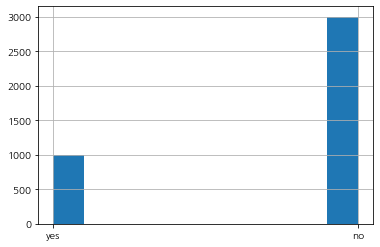

In [6]:
train_df['y'].hist()
print(train_df['y'].value_counts())

불균형 데이터의 문제점 : 다수 클래스는 잘 맞춰 정확도는 높게 나올 수 있으나, 소수 클래스에 대해서는 제대로 분류하지 못하여 모델 성능에 왜곡을 일으키게 됨

#### Object 변수 분포 시각화

<AxesSubplot:xlabel='pdays', ylabel='count'>

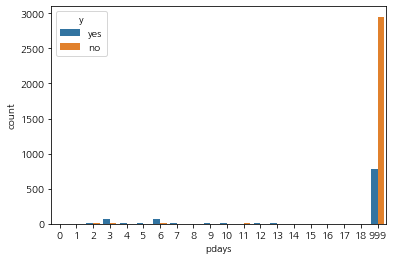

In [7]:
sns.countplot(train_df.pdays, hue=train_df.y)

pdays : 지난 홍보와 관련하여 해당 고객을 contact하고 지나간 날수 (999는 이전에 contact하지 않은 사람을 나타냄)
- pdays가 999가 아닌 사람의 비율은 적고, 모두 class가 yes임

--> pdays의 값 자체가 class 분류에 영향을 크게 안 미칠 것이라 판단하여 이진변수로 변환

In [8]:
#  pdays가 "no"면 이전에 contact 하지 않은 경우 / pdays가 "yes"이면 이전에 contact한 경우로 해석
train_df["pdays"] = train_df["pdays"].apply(lambda x: "no" if x==999 else "yes").astype(str)

<AxesSubplot:xlabel='pdays', ylabel='count'>

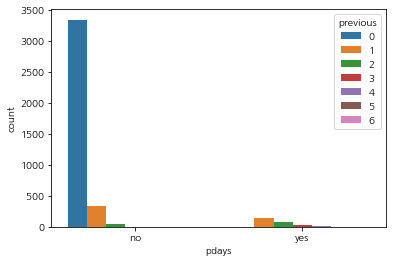

In [9]:
sns.countplot(train_df.pdays, hue=train_df.previous)

previous: 이번 홍보 이전에 해당 고객을 contact한 횟수
- pdays가 no 인데, previous 값이 0이 아닌 경우 해석이 어려워보임

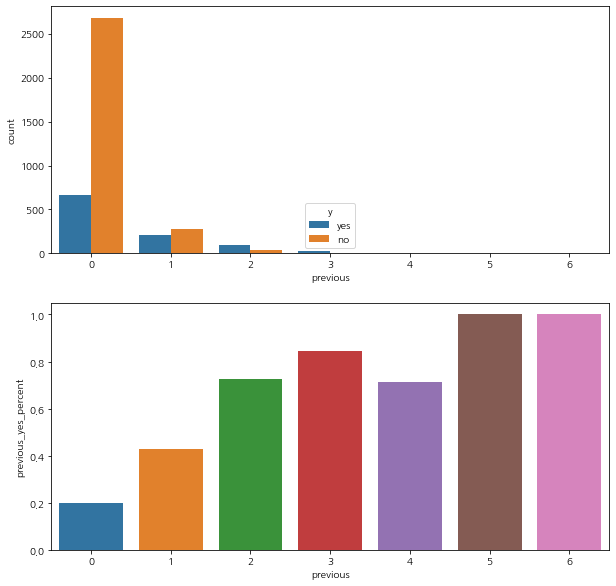

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))

ax1 = sns.countplot(train_df.previous, hue=train_df.y, ax=ax1)

previous_yes = (train_df['y']=='yes').groupby(train_df['previous']).agg(lambda x: x.sum() / len(x)).reset_index(name='previous_yes_percent')
ax2 = sns.barplot(previous_yes.previous, previous_yes.previous_yes_percent, ax=ax2)

plt.show()

previous가 커질수록 class가 yes인 비율이 높음

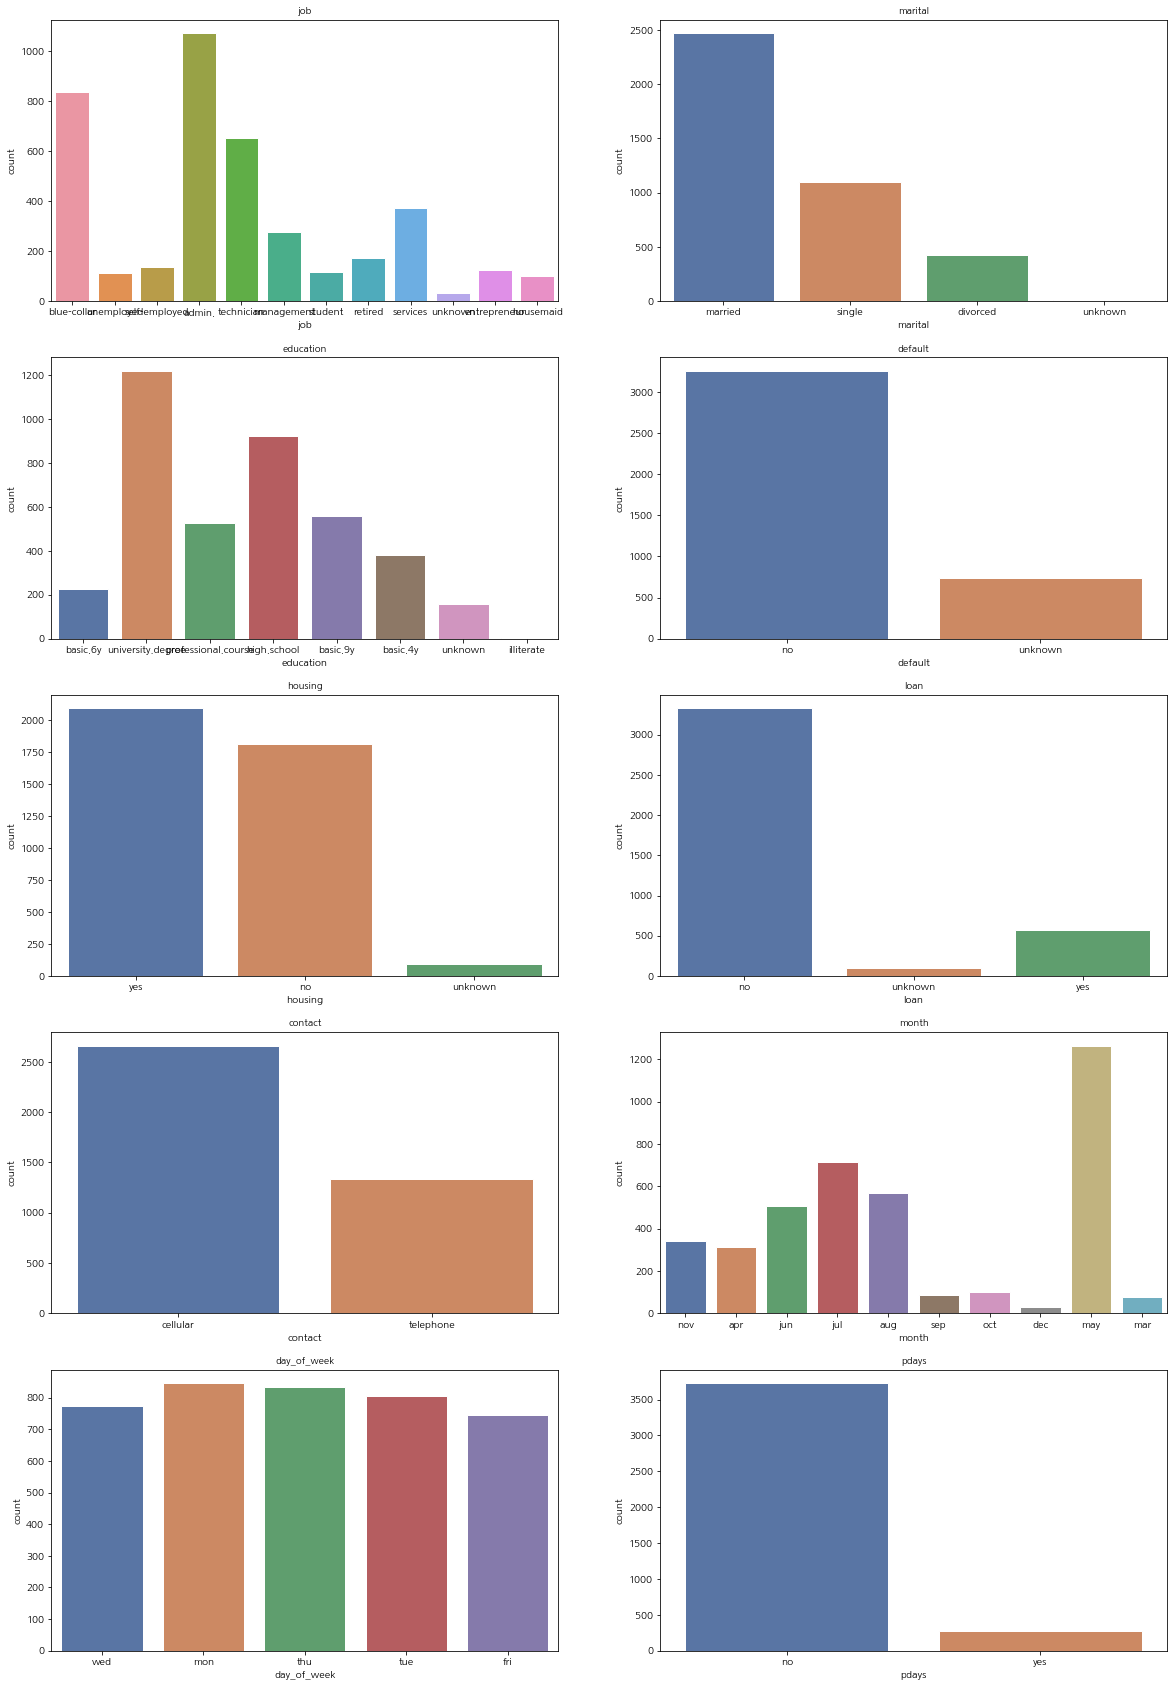

In [11]:
object_col = train_df.select_dtypes('object').columns # Object형 변수 추출
object_col.drop(["y"])

fig, axs = plt.subplots(5, 2, figsize = (20,30))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10 = axs.flatten()
sns.set(font_scale=0.8)

for row in range(5):
    for col in range(2):
        idx = row*2 + col
        
        if idx < len(object_col):
            ax = axs[row][col]
            col_name = object_col[idx]
            sns.countplot(x=col_name, data=train_df, ax=ax)
            ax.set_title(col_name)

- 범주형 변수의 값으로 unknown 값이 존재하는 것 확인

    -> unknown 값을 결측치로 판단
    <br>
    - But, default의 값은 unknown값을 제외하면 모두 no임.
    
       -> 정보가 없다고 판단하여 변수 삭제

In [12]:
train_df.drop(columns="default", inplace=True)

In [13]:
train_df.isnull().sum() # 결측치로 그 이외의 null 값은 없는 것 확인

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
y                 0
dtype: int64

In [14]:
# unknown값을 결측치로 대체
train_df = train_df.applymap(lambda x: np.nan if x=='unknown' else x)
train_df

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,40,blue-collar,married,basic.6y,yes,no,cellular,nov,wed,1,no,0,nonexistent,-0.1,93.200,-42.0,yes
1,30,unemployed,single,university.degree,yes,no,cellular,apr,wed,1,no,0,nonexistent,-1.8,93.075,-47.1,yes
2,36,self-employed,single,university.degree,no,no,cellular,jun,mon,1,no,0,nonexistent,-2.9,92.963,-40.8,yes
3,34,admin.,married,university.degree,yes,no,cellular,jul,thu,1,yes,3,success,-1.7,94.215,-40.3,yes
4,38,technician,married,professional.course,yes,no,cellular,aug,mon,1,no,0,nonexistent,1.4,93.444,-36.1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,32,blue-collar,married,basic.4y,no,no,cellular,jul,mon,5,no,0,nonexistent,1.4,93.918,-42.7,no
3996,32,services,single,professional.course,yes,no,telephone,may,thu,1,no,0,nonexistent,1.1,93.994,-36.4,no
3997,24,admin.,single,high.school,no,no,telephone,jul,wed,6,no,0,nonexistent,1.4,93.918,-42.7,no
3998,28,blue-collar,married,basic.9y,no,no,telephone,may,thu,1,no,0,nonexistent,1.1,93.994,-36.4,no


각 범주형 변수에 따른 종속변수의 분포에 대해 자세히 살펴보기

<AxesSubplot:xlabel='housing', ylabel='count'>

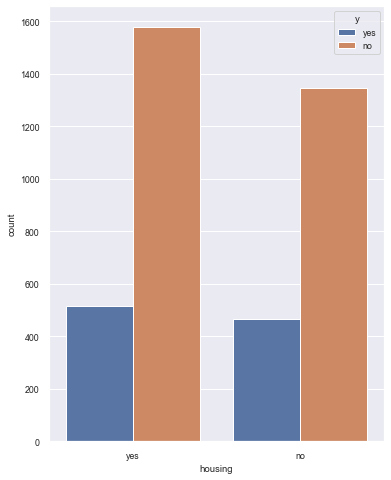

In [15]:
plt.rcParams['figure.figsize'] = [6,8]
sns.countplot(x='housing', data=train_df, hue='y')

-> housing 변수가 yes, no housing, unknown일 때 모두 y가 no인 경우가 더 많음 

<AxesSubplot:xlabel='loan', ylabel='count'>

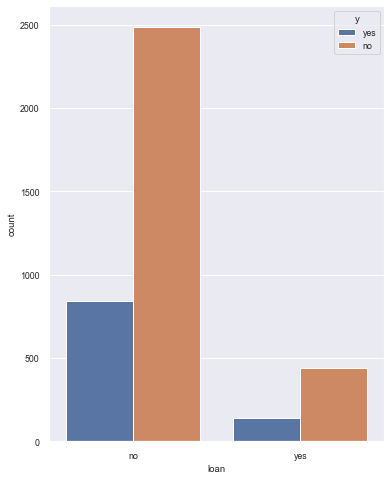

In [16]:
sns.countplot(x='loan', data=train_df, hue='y')

-> loan이 no일 때와 yes일 때 모두 예금을 예치 안한 경우(y='no')가 예치한 경우(y='yes')보다 많음

<AxesSubplot:xlabel='contact', ylabel='count'>

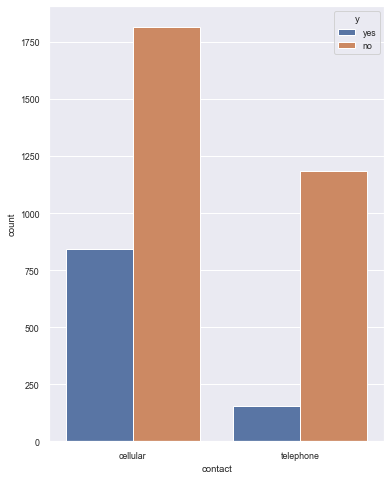

In [17]:
sns.countplot(x='contact', data=train_df, hue='y')

-> telemarketing수단인 contact이 celluar일 때와 telephone일 때 모두 예치를 안한 경우가 한 경우보다 많음

<AxesSubplot:xlabel='poutcome', ylabel='count'>

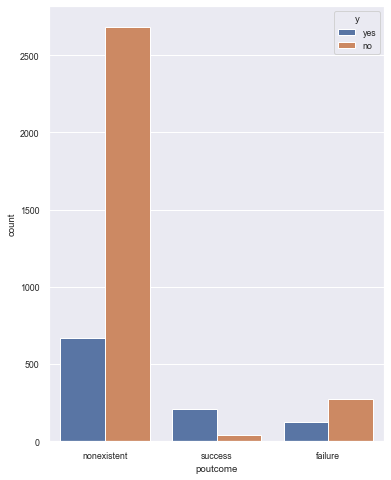

In [18]:
sns.countplot(x='poutcome', data=train_df, hue='y')

-> nonexistent로 보아 이전의 마케팅에 참여한 적이 없는 새로운 신규 고객들이 대다수인 것을 알 수 있음

<AxesSubplot:xlabel='month', ylabel='count'>

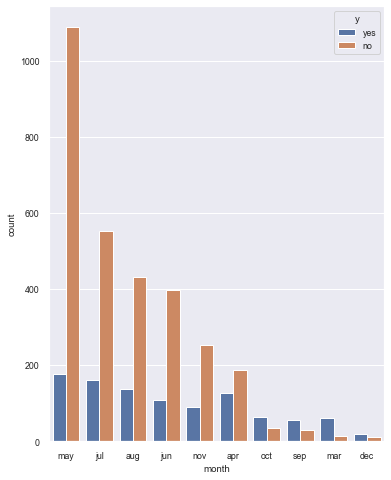

In [19]:
sns.countplot(x='month', data=train_df, hue='y',
              order = train_df['month'].value_counts().index)

-> 마지막으로 진행한 contact의 월이 5,6,7,8월에 집중적으로 많은 것으로 보아 이때 가입자 수가 많은 것을 확인 할 수 있음

<AxesSubplot:xlabel='marital', ylabel='count'>

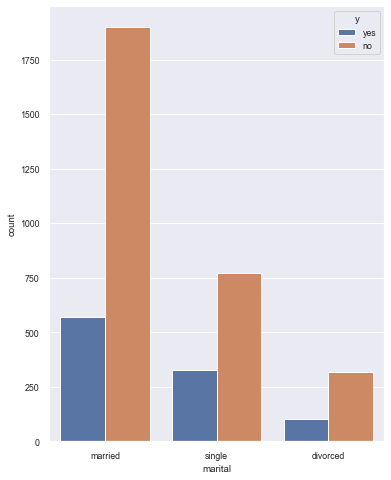

In [20]:
sns.countplot(x='marital', data=train_df, hue='y')

-> 결혼 상태에 따라 married(기혼), single(미혼), divorced(이혼)의 순으로 예금 예치 여부가 차이나는 것을 확인할 수 있음 

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

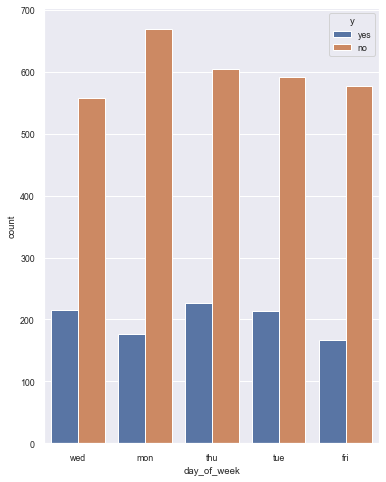

In [21]:
sns.countplot(x='day_of_week',data=train_df, hue='y')

-> 특정 요일에 편향이 안되어있고 고르게 y 분포가 형성되어 있는 것을 보아 y 분류에 영향을 크게 안미칠 것이라 판단

#### Numeric형 변수 분포 시각화

<AxesSubplot:>

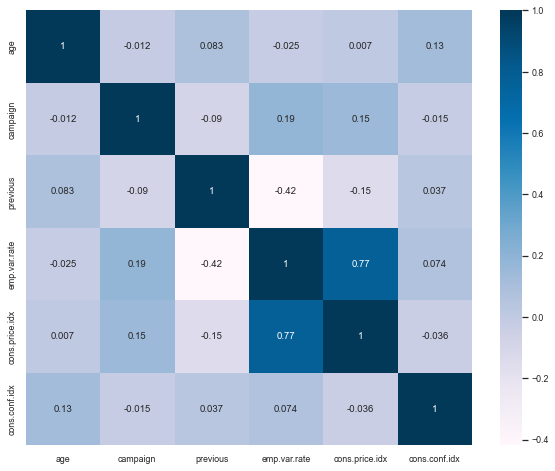

In [22]:
# 상관관계 시각화
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(), annot=True, cmap=plt.cm.PuBu)

- (emp.var.rate, cons.price.idx), (previous, emp.var.rate) 간의 상관관계가 있어보임

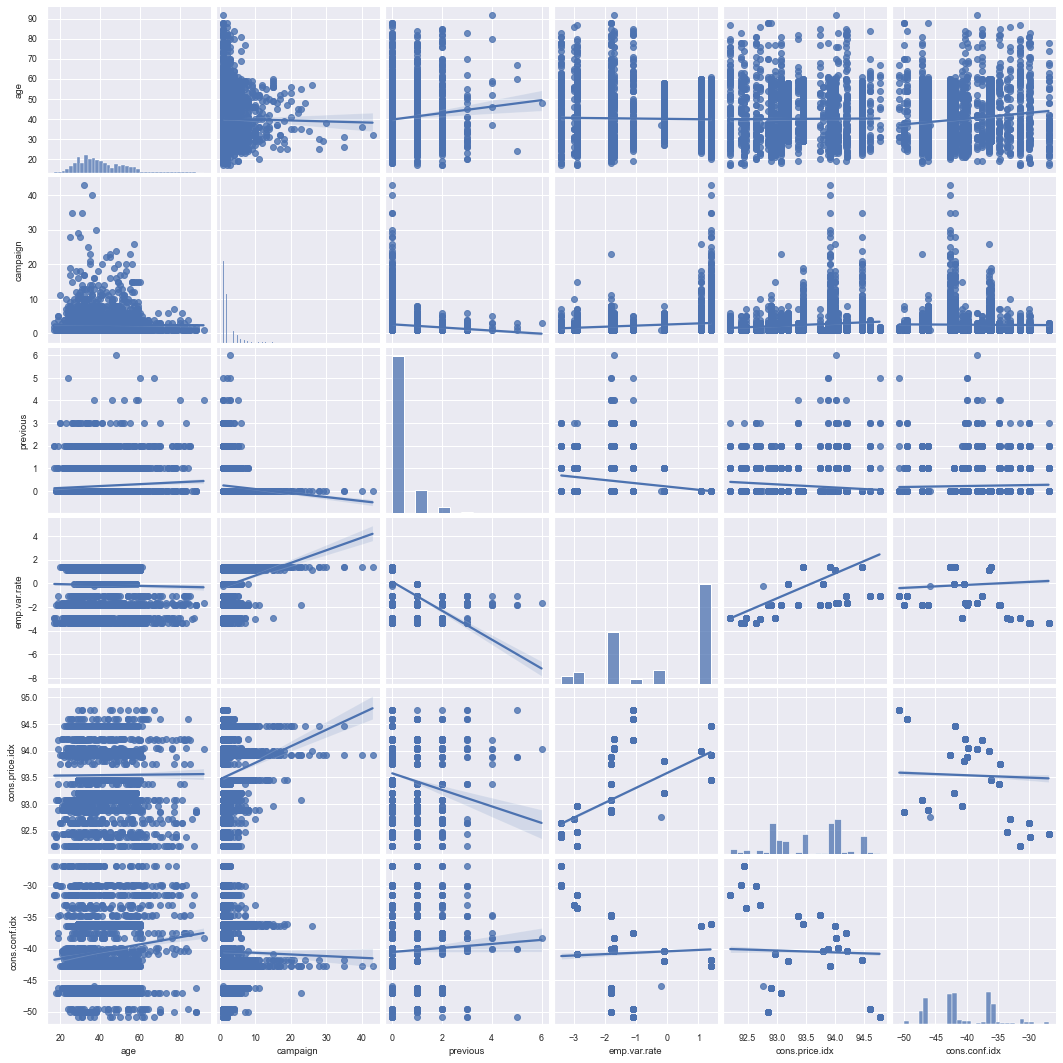

In [23]:
# class 구분되지 않은 pairplot 시각화
sns.pairplot(train_df, kind="reg")

<Figure size 1080x1080 with 0 Axes>

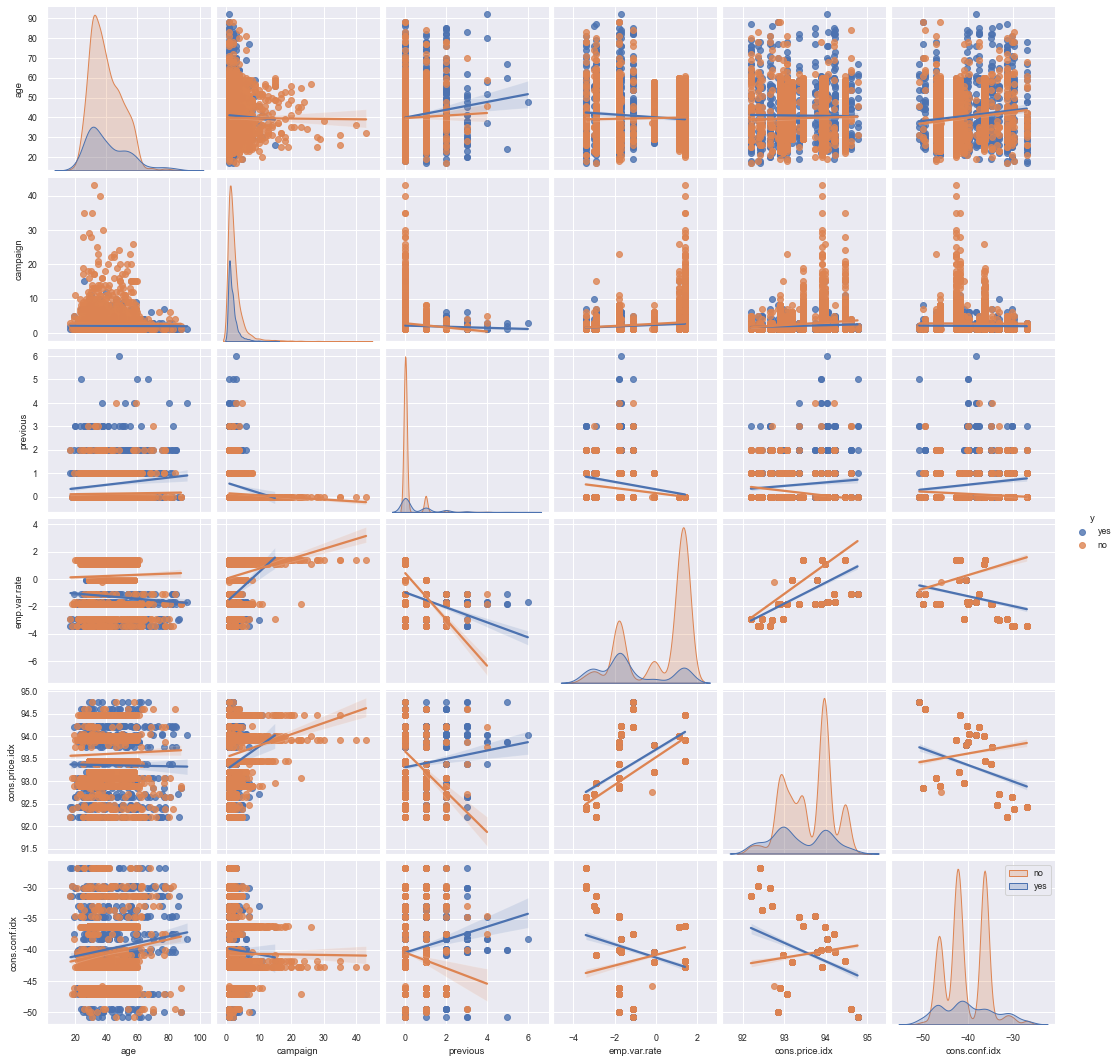

In [24]:
# # class 구분된 pairplot 시각화
plt.figure(figsize=(15,15))
sns.pairplot(train_df, hue="y", kind="reg")
plt.legend(labels=["no","yes"])

class에 따라서 변수간의 상관관계가 다소 다름
- 위의 pairplot과 비교해보면 : 변수간의 관계 경향이 class가 "no"인 경우로 따라가는 경우가 있음을 알 수 있음
#### --> class 불균형 해결이 중요해보임 

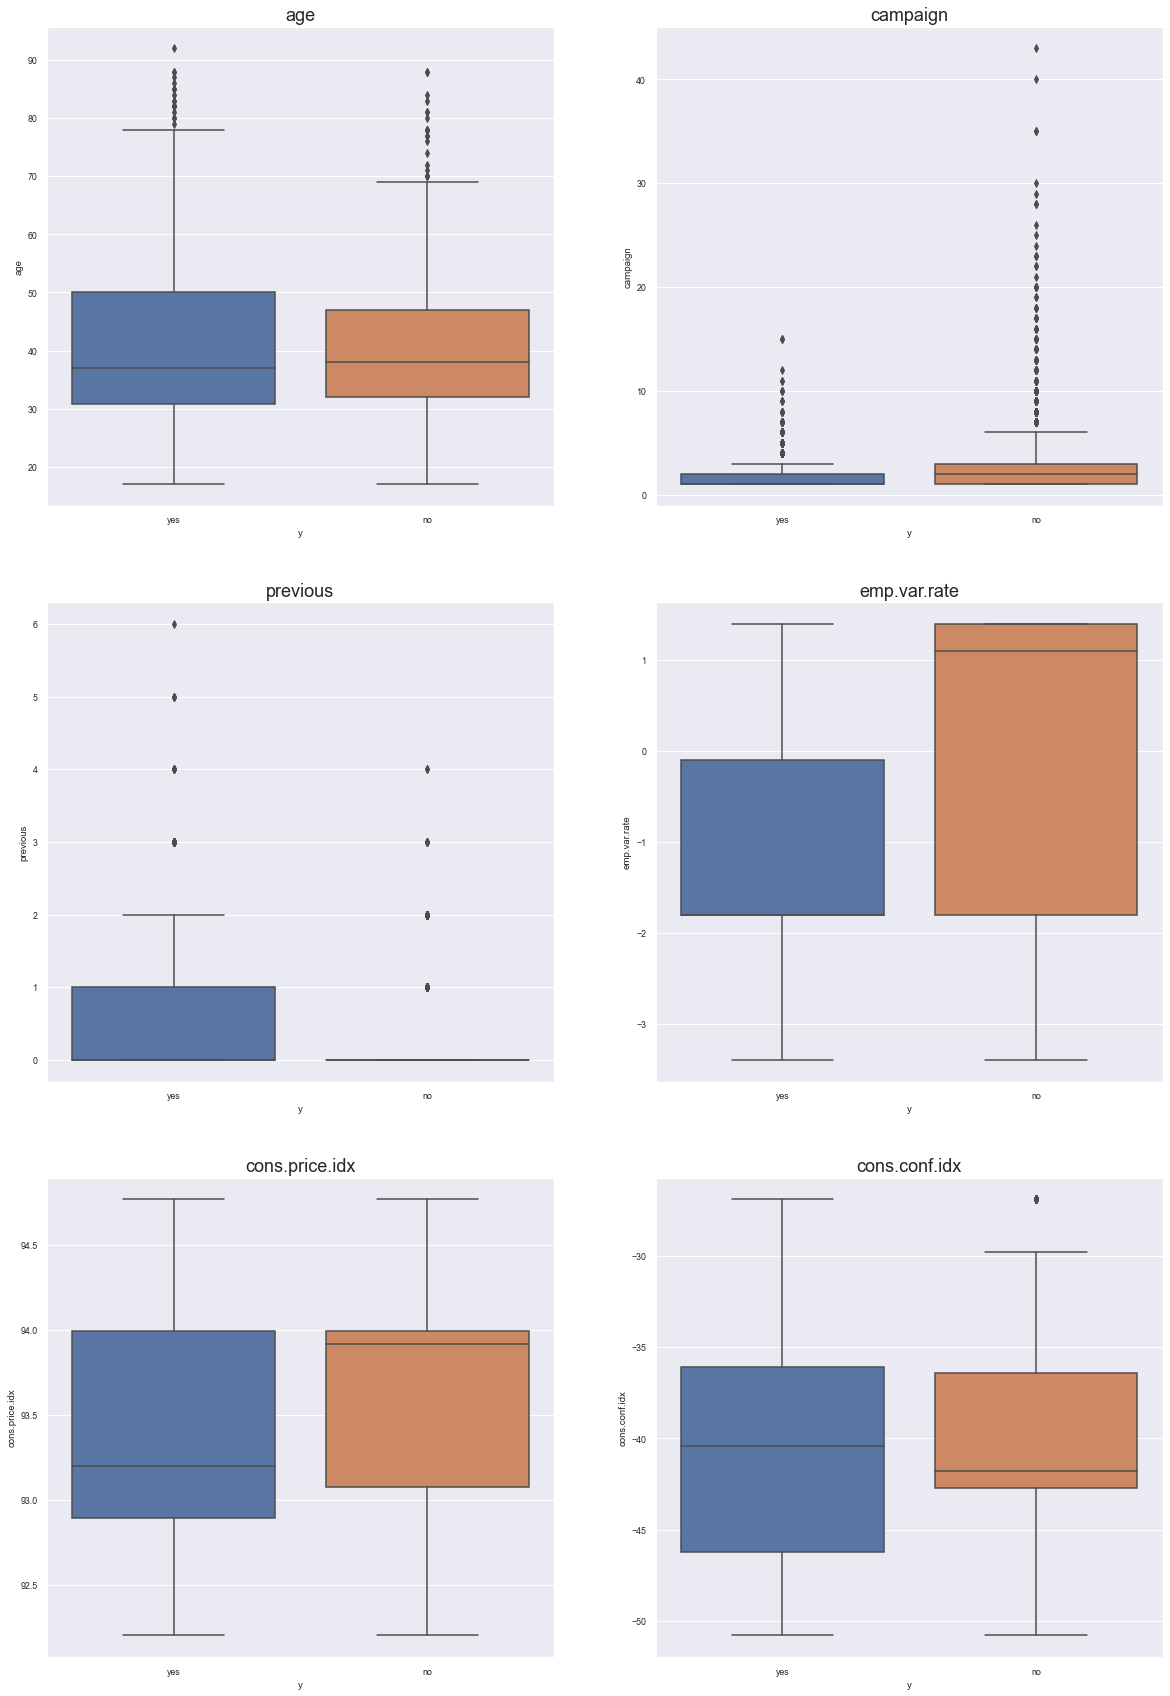

In [25]:
num_col = train_df.select_dtypes(["int","float"]).columns # Numeric형 변수 추출

fig, axs = plt.subplots(3, 2, figsize = (20,30))
ax1, ax2, ax3, ax4, ax5, ax6 = axs.flatten()
sns.set(font_scale=1.5)

for row in range(3):
    for col in range(2):
        idx = row*2 + col
        
        if idx < len(num_col):
            ax = axs[row][col]
            col_name = num_col[idx]
            sns.boxplot(x="y", y=col_name, data=train_df, ax=ax)
            ax.set_title(col_name)

cons.conf.idx(소비자신뢰지수) , emp.var.rate(고용변동율에)에 따른 y의 분포의 차이가 있음을 확인 가능

<AxesSubplot:xlabel='age', ylabel='Density'>

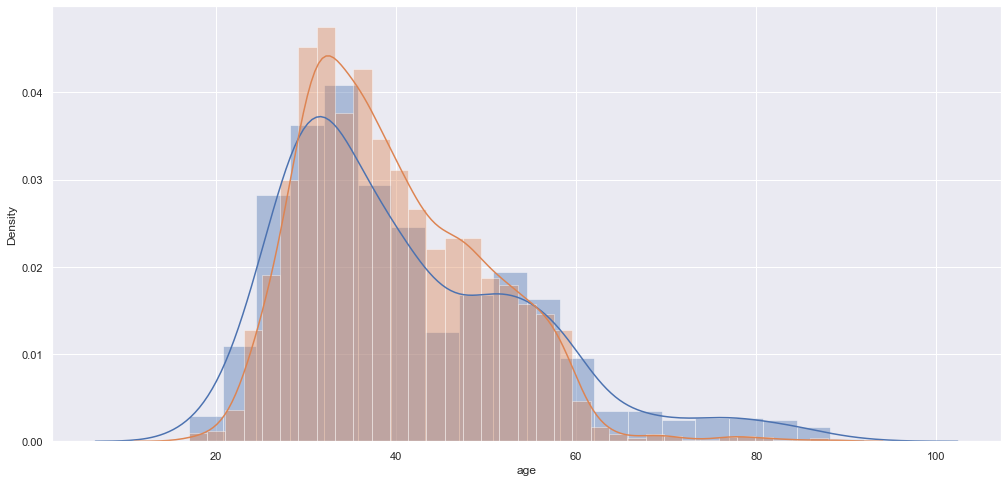

In [26]:
# age에 대해 자세히 살펴보기
sns.set(rc={'figure.figsize':(17,8)})
sns.distplot(train_df.age[train_df.y=="yes"])
sns.distplot(train_df.age[train_df.y=="no"])

class에 관계없이 age(나이)에 따른 분포가 비슷함

In [27]:
# age를 10단위 그룹별로 보기
bins = [10,20,30,40,50,60,70,80,90,100]
labels=['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']

# age 그룹별로 예금한 비율 시각화
# eda를 위해 임의로 train data copy본 생성
for_age = train_df.copy()
for_age['agegroup'] = pd.cut(for_age['age'],bins, labels)
for_age = (for_age['y']=='yes').groupby(for_age['agegroup']).agg(lambda x: x.sum() / len(x)).reset_index(name='yes_percent')

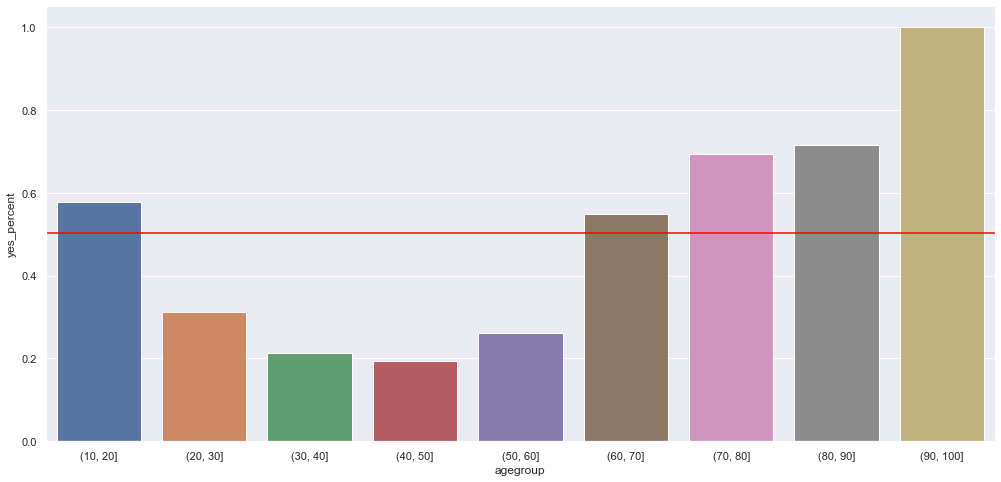

In [28]:
sns.barplot(x='agegroup', y='yes_percent', data=for_age)
plt.axhline(y=for_age.yes_percent.mean(), color='red')

age를 10단위 그룹별로 봤을 때
- 20~50대는 y=no인 경우,즉 예금을 예치하지 않은 비율이 높은 반면
- 60대 이후부터는 y=yes인 경우 즉, 예금을 예치한 비율이 높은 것 확인 가능

### 문제의 목적에 맞는 Custom Scoring 함수 생성

In [29]:
def custom_scoring(y_test, y_pred):
    yes_defer_score = sum(((y_test!=y_pred) & (y_test==1)))*(-3)
    no_try_score = sum(((y_test!=y_pred) & (y_test==0)))*(-1)
    yes_try_score = sum(((y_test==y_pred) & (y_test==1)))*(+5)
    no_defer_score = sum(((y_test==y_pred) & (y_test==0)))*0
    
    total_score = yes_defer_score+no_try_score+yes_try_score+no_defer_score
    
    return total_score

In [86]:
# 오버샘플링 시 데이터 개수 달라져서 공평한 비교를 위한 mean_custom_scoring 함수 
def mean_custom_scoring(y_test, y_pred):
    yes_defer_score = sum(((y_test!=y_pred) & (y_test==1)))*(-3)
    no_try_score = sum(((y_test!=y_pred) & (y_test==0)))*(-1)
    yes_try_score = sum(((y_test==y_pred) & (y_test==1)))*(+5)
    no_defer_score = sum(((y_test==y_pred) & (y_test==0)))*0
    
    total_score = yes_defer_score+no_try_score+yes_try_score+no_defer_score
    
    return total_score/len(y_test)

# 모델 학습

## Random Forest

### 결정트리 모델에 넣기 위한 변수 정제작업
#### 변수 인코딩

1. 이진 변수 더미화
2. Ordinal Encoding

In [30]:
train_df.nunique()

age               72
job               11
marital            3
education          7
housing            2
loan               2
contact            2
month             10
day_of_week        5
campaign          32
pdays              2
previous           7
poutcome           3
emp.var.rate      10
cons.price.idx    26
cons.conf.idx     26
y                  2
dtype: int64

이진변수 : housing, loan, contact, y

In [31]:
# 이진 변수 처리
train2_df = pd.get_dummies(train_df, columns = ['housing', 'pdays','loan', 'contact', 'y'], drop_first=True)
train2_df.head(20)

,age,job,marital,education,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,housing_yes,pdays_yes,loan_yes,contact_telephone,y_yes
0,40,blue-collar,married,basic.6y,nov,wed,1,0,nonexistent,-0.1,93.200,-42.0,1,0,0,0,1
1,30,unemployed,single,university.degree,apr,wed,1,0,nonexistent,-1.8,93.075,-47.1,1,0,0,0,1
2,36,self-employed,single,university.degree,jun,mon,1,0,nonexistent,-2.9,92.963,-40.8,0,0,0,0,1
3,34,admin.,married,university.degree,jul,thu,1,3,success,-1.7,94.215,-40.3,1,1,0,0,1
4,38,technician,married,professional.course,aug,mon,1,0,nonexistent,1.4,93.444,-36.1,1,0,0,0,1
5,45,management,married,university.degree,jul,thu,2,2,success,-1.7,94.215,-40.3,1,1,0,0,1
6,42,admin.,single,high.school,sep,wed,1,1,success,-1.1,94.199,-37.5,0,1,0,0,1
7,49,admin.,married,high.school,sep,tue,1,1,success,-3.4,92.379,-29.8,0,1,0,0,1
8,17,student,single,basic.9y,aug,fri,2,1,failure,-2.9,92.201,-31.4,0,0,0,0,1
9,46,blue-collar,married,professional.course,jun,thu,1,0,nonexistent,1.4,94.465,-41.8,0,0,0,1,1


### 결측치 대체- MICE Imputation with LightGBM

In [32]:
# convert object columns to categorical type
list_str_obj_cols = train2_df.columns[train2_df.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    train2_df[str_obj_col] = train2_df[str_obj_col].astype("category")

In [33]:
import miceforest as mf

# Kernel 생성
kds = mf.ImputationKernel(
  train2_df,
  save_all_iterations=True,
  random_state=100
)

# MICE algorithm (5 iterations)
kds.mice(5)

train_imputed = kds.complete_data()

In [34]:
train_imputed.isnull().sum() # 결측치 대체된 것 확인

age                  0
job                  0
marital              0
education            0
month                0
day_of_week          0
campaign             0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
housing_yes          0
pdays_yes            0
loan_yes             0
contact_telephone    0
y_yes                0
dtype: int64

In [35]:
train_imputed

,age,job,marital,education,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,housing_yes,pdays_yes,loan_yes,contact_telephone,y_yes
0,40,blue-collar,married,basic.6y,nov,wed,1,0,nonexistent,-0.1,93.200,-42.0,1,0,0,0,1
1,30,unemployed,single,university.degree,apr,wed,1,0,nonexistent,-1.8,93.075,-47.1,1,0,0,0,1
2,36,self-employed,single,university.degree,jun,mon,1,0,nonexistent,-2.9,92.963,-40.8,0,0,0,0,1
3,34,admin.,married,university.degree,jul,thu,1,3,success,-1.7,94.215,-40.3,1,1,0,0,1
4,38,technician,married,professional.course,aug,mon,1,0,nonexistent,1.4,93.444,-36.1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,32,blue-collar,married,basic.4y,jul,mon,5,0,nonexistent,1.4,93.918,-42.7,0,0,0,0,0
3996,32,services,single,professional.course,may,thu,1,0,nonexistent,1.1,93.994,-36.4,1,0,0,1,0
3997,24,admin.,single,high.school,jul,wed,6,0,nonexistent,1.4,93.918,-42.7,0,0,0,1,0
3998,28,blue-collar,married,basic.9y,may,thu,1,0,nonexistent,1.1,93.994,-36.4,0,0,0,1,0


트리구조에서는 원핫인코딩을 사용하면 문제가 발생할 수 있으므로 범주형 변수(명목 및 순서)들에 Ordinal Encoder(순서형 인코더) 적용

In [36]:
from category_encoders import OrdinalEncoder
encoder = OrdinalEncoder(cols = ['job', 'marital', 'education', 'month', 'poutcome', 'day_of_week']) 
df = encoder.fit_transform(train_imputed)

In [37]:
# 연령대 별로 구분하기
bins = [10, 20, 30, 40, 50, 60, 70, 80, np.inf]
labels = ['10', '20', '30', '40', '50', '60', '70', '80']
df['ageGroup'] = pd.cut(df['age'], bins, right=False, labels=labels )

In [64]:
df['ageGroup'] = pd.to_numeric(df['ageGroup'])

In [66]:
X = df.drop(['y_yes','age'], axis=1)
y = df['y_yes']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### scoring을 만들어 사용
- scroing : 하이퍼파라미터 튜닝할때, 새롭게 정의된 비용함수(custom_scoring)가 최적화되도록 지정

### Class 불균형 해결 (1)
### - Weight Balancing
- class Imbalance가 심하여 class에 따른 가중치 부여
    - class 별로 loss function에 weight을 부여
    - minority class에 속한 데이터 샘플에 더 집중해 학습할 수 있도록 loss 값에 weight를 부여하는 방법
    - --> Class weight 도 parameter로 지정

In [68]:
weights = np.linspace(0.0,0.99,10)

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer

params = {'n_estimators' : [10, 100],
          'max_depth' : [6, 8, 10, 12],
          'min_samples_leaf' : [8, 12, 18],
          'min_samples_split' : [8, 16, 20],
          'class_weight': [{0:x, 1:1.0-x} for x in weights]
         }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = StratifiedKFold(5), n_jobs = -1, verbose=2, scoring=make_scorer(custom_scoring), return_train_score=True)
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'class_weight': [{0: 0.0, 1: 1.0}, {0: 0.11, 1: 0.89},
                                          {0: 0.22, 1: 0.78},
                                          {0: 0.33, 1: 0.6699999999999999},
                                          {0: 0.44, 1: 0.56},
                                          {0: 0.55, 1: 0.44999999999999996},
                                          {0: 0.66, 1: 0.33999999999999997},
                                          {0: 0.77, 1: 0.22999999999999998},
                                          {0: 0.88, 1: 0.12},
                                          {0: 0.99, 1: 0.010000000000000009}],
                         'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],


In [70]:
rf_grid = grid_cv.best_estimator_
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'class_weight': {0: 0.11, 1: 0.89}, 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 376.4000


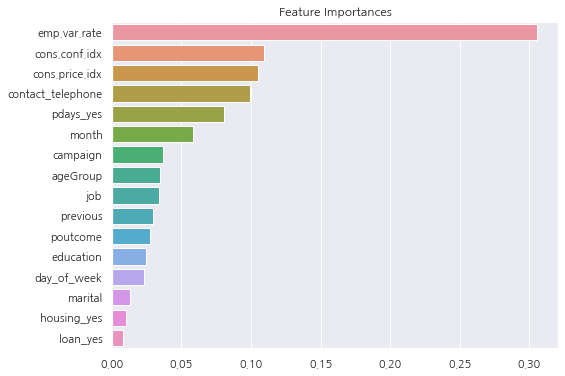

In [71]:
# Feature Importance 시각화
ser = pd.Series(rf_grid.feature_importances_, index=X_train.columns)

feature_sel = ser.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=feature_sel, y=feature_sel.index)
plt.show()

In [72]:
# GridSsearch 결과
rf_grid_results = pd.DataFrame(grid_cv.cv_results_)
rf_grid_results["yes_class_weight"] = rf_grid_results["param_class_weight"].apply(pd.Series).drop(columns=0) # yes class의 weight
rf_grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,yes_class_weight
0,0.068815,0.004845,0.036720,0.001182,"{0: 0.0, 1: 1.0}",6,8,8,10,"{'class_weight': {0: 0.0, 1: 1.0}, 'max_depth'...",...,0.0,66,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,0.0,1.00
1,0.504850,0.080931,0.091134,0.008902,"{0: 0.0, 1: 1.0}",6,8,8,100,"{'class_weight': {0: 0.0, 1: 1.0}, 'max_depth'...",...,0.0,66,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,0.0,1.00
2,0.097629,0.010544,0.046992,0.013279,"{0: 0.0, 1: 1.0}",6,8,16,10,"{'class_weight': {0: 0.0, 1: 1.0}, 'max_depth'...",...,0.0,66,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,0.0,1.00
3,0.647189,0.054960,0.080548,0.004116,"{0: 0.0, 1: 1.0}",6,8,16,100,"{'class_weight': {0: 0.0, 1: 1.0}, 'max_depth'...",...,0.0,66,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,0.0,1.00
4,0.107852,0.013114,0.055495,0.007482,"{0: 0.0, 1: 1.0}",6,8,20,10,"{'class_weight': {0: 0.0, 1: 1.0}, 'max_depth'...",...,0.0,66,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,0.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.965661,0.130997,0.296654,0.047464,"{0: 0.99, 1: 0.010000000000000009}",12,18,8,100,"{'class_weight': {0: 0.99, 1: 0.01000000000000...",...,0.0,694,-1920.0,-1920.0,-1920.0,-1920.0,-1920.0,-1920.0,0.0,0.01
716,0.393130,0.053722,0.185105,0.048148,"{0: 0.99, 1: 0.010000000000000009}",12,18,16,10,"{'class_weight': {0: 0.99, 1: 0.01000000000000...",...,0.0,694,-1920.0,-1920.0,-1920.0,-1920.0,-1920.0,-1920.0,0.0,0.01
717,1.041285,0.160613,0.222023,0.062826,"{0: 0.99, 1: 0.010000000000000009}",12,18,16,100,"{'class_weight': {0: 0.99, 1: 0.01000000000000...",...,0.0,694,-1920.0,-1920.0,-1920.0,-1920.0,-1920.0,-1920.0,0.0,0.01
718,0.339741,0.096032,0.159494,0.019238,"{0: 0.99, 1: 0.010000000000000009}",12,18,20,10,"{'class_weight': {0: 0.99, 1: 0.01000000000000...",...,0.0,694,-1920.0,-1920.0,-1920.0,-1920.0,-1920.0,-1920.0,0.0,0.01


In [73]:
cv_score = rf_grid_results.groupby("yes_class_weight").mean()[["mean_train_score", "mean_test_score"]].reset_index().sort_values("yes_class_weight")
cv_score["mean_train_score"] = cv_score["mean_train_score"]/len(y_train)
cv_score["mean_test_score"] = cv_score["mean_test_score"]/len(y_test)

In [74]:
def plot_validation_curve(param_range):
    plt.figure(figsize=(13,8))
    train_mean = cv_score["mean_train_score"]
    test_mean = cv_score["mean_test_score"]
    plt.plot(param_range, cv_score["mean_train_score"], label='train score', color='blue', marker='o')
    plt.plot(param_range, cv_score["mean_test_score"], label='test score', color='red', marker='o')
    plt.title("Score by Class Weight", size=20)
    plt.grid(ls='--')
    plt.xlabel('Weight of class "Yes"', size=15)
    plt.ylabel('Average Score', size=15)
    plt.legend(loc='best')
    plt.show()

In [75]:
param_range = [{0:x, 1:1.0-x} for x in weights]
param_range = [x[1] for x in param_range]
param_range = sorted(param_range)

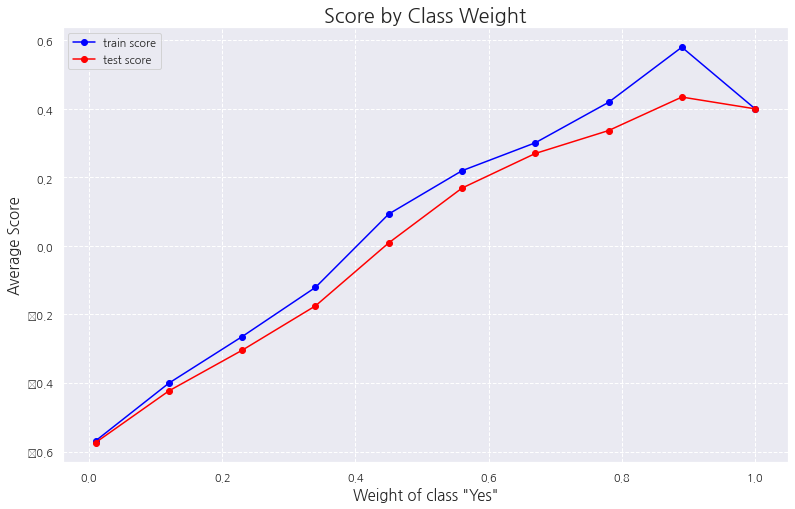

In [76]:
plot_validation_curve(param_range)

### class_weight Parameter 설정을 통한 Class Imbalance 해결

- 하이퍼파라미터 튜닝을 하였을 때, Minority class에 속한 Yes class의 가중치가 높을 때 성능이 높은 것을 확인할 수 있다.

In [77]:
rf_pred = rf_grid.predict(X_test)

In [87]:
print(custom_scoring(y_test, rf_pred))
print(mean_custom_scoring(y_test, rf_pred))

458
0.5725


In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def performance(y_test, pred):
    cm = confusion_matrix(y_test,pred)
    sns.set(font_scale=2)
    sns.set(rc={'figure.figsize':(6,6)})
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    ax.set(xlabel='predict', ylabel='true')

    accuracy = accuracy_score(y_test, pred)
    print("정확도:", accuracy)

    precision = precision_score(y_test, pred)
    print("정밀도:", precision) 

    recall = recall_score(y_test, pred)
    print("재현율:", recall) 

    f1 = f1_score(y_test, pred)
    print("f1 점수:", f1)

정확도: 0.55875
정밀도: 0.3466933867735471
재현율: 0.865
f1 점수: 0.4949928469241774


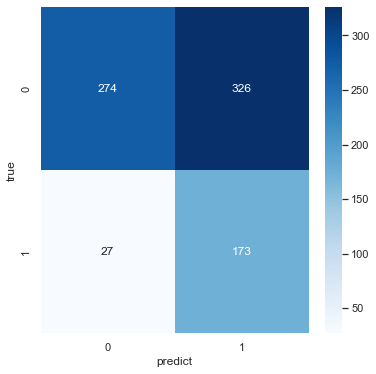

In [80]:
performance(y_test, rf_pred)

Confusion Matrix를 분석해보면
- **재현율**이 0.87로 비교적 높게 나옴.
    - 비용함수 구성 중에  **marketing에 성공할 수 있는 고객을 marketing을 보류하여 놓치는 기회비용이 –3**으로 치명적인데, (즉, 실제 예금한 고객 중에서 예금 안 할 고객이라고 잘못 예측) 이 비용함수를 최적화한 결과로 해석됨

### Class 불균형 해결 (2)
### - OverSampling - SMOTE
- 소수 클래스 데이터 사이에 새로운 데이터를 생성하는 방법
- SMOTE-NC : 범주형 변수에 대해서도 적용 가능

In [100]:
# SMOTE-NC (Non Continuous)
from imblearn.over_sampling import SMOTENC

smote = SMOTENC(categorical_features=[0,1,2,3,4,7,10,11,12,13,14], random_state=0)

X_train_smote ,y_train_smote = smote.fit_resample(X_train,y_train)

Text(0.5, 1.0, 'SMOTE 적용 후 class 값 분포')

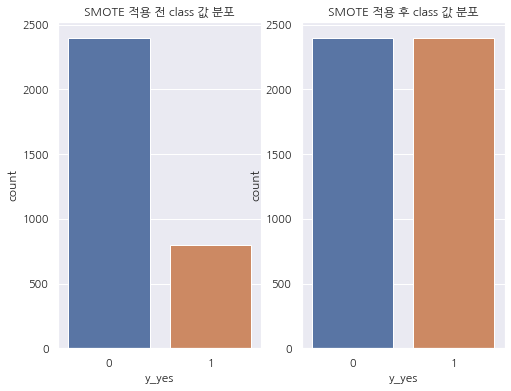

In [101]:
# 오버샘플링 된 것 확인
plt.rcParams['font.family'] = 'NanumGothic' # 한글깨짐 방지

plt.figure(figsize=(8,6))
plt.subplot(1, 2, 1)
sns.countplot(y_train)
plt.title("SMOTE 적용 전 class 값 분포")

plt.subplot(1, 2, 2)
sns.countplot(y_train_smote)
plt.title("SMOTE 적용 후 class 값 분포")

In [103]:
params = {'n_estimators' : [10, 100],
          'max_depth' : [6, 8, 10, 12],
          'min_samples_leaf' : [8, 12, 18],
          'min_samples_split' : [8, 16, 20]
         }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv_smote = GridSearchCV(rf_clf, param_grid = params, cv = StratifiedKFold(5), n_jobs = -1, verbose=2, scoring=make_scorer(custom_scoring), return_train_score=True)
grid_cv_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [10, 100]},
             return_train_score=True, scoring=make_scorer(custom_scoring),
             verbose=2)

In [104]:
rf_grid_smote = grid_cv_smote.best_estimator_
print('최적 하이퍼 파라미터: ', grid_cv_smote.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_smote.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 1407.2000


In [105]:
rf_pred_smote = rf_grid_smote.predict(X_test)

In [106]:
print(custom_scoring(y_test, rf_pred_smote))
print(mean_custom_scoring(y_test, rf_pred_smote))

275
0.34375


### -> Class 불균형 해결 위해 SMOTE 기법 사용했을 때보다 class weight 조정했을 때가 성능 더 높음

#  Logistic Regression

In [123]:
# 범주형 변수들
cat_col = ['job','marital','education', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome','pdays', 'y']

In [124]:
# 1. dummy로 처리할 범주형 변수 처리 
cat_dummy = ['job', 'marital','education','month','day_of_week', 'housing', 'loan', 'contact','poutcome', 'pdays']
data_dummy = pd.get_dummies(train_df.loc[:,cat_dummy],columns=cat_dummy, drop_first=True)

# 2. 값만 변환할 종속변수
cat_value = ['y']
y_map = {'yes':1, 'no':0}

In [125]:
train_for_lc = train_df.copy()
train_for_lc = train_for_lc.drop(columns = cat_col)
train_for_lc['y'] = train_df['y'].apply(lambda x : y_map[x])
train_for_lc = pd.concat([train_for_lc, data_dummy], axis=1)
train_for_lc

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,y,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success,pdays_yes
0,40,1,0,-0.1,93.200,-42.0,1,1,0,0,...,0,0,0,1,1,0,0,1,0,0
1,30,1,0,-1.8,93.075,-47.1,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
2,36,1,0,-2.9,92.963,-40.8,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,34,1,3,-1.7,94.215,-40.3,1,0,0,0,...,0,1,0,0,1,0,0,0,1,1
4,38,1,0,1.4,93.444,-36.1,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,32,5,0,1.4,93.918,-42.7,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3996,32,1,0,1.1,93.994,-36.4,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0
3997,24,6,0,1.4,93.918,-42.7,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
3998,28,1,0,1.1,93.994,-36.4,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0


RandomForest 모델과 마찬가지로
- 새롭게 정의된 비용함수(custom_scoring)가 최적화되도록 지정
- Class imbalance 문제를 해결하기 위해 class에 따른 가중치 부여
    - Class weight 도 parameter로 지정

In [126]:
X = train_for_lc.drop('y', axis=1)
y = train_for_lc['y']

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [128]:
# 표준화
from sklearn.preprocessing import StandardScaler  
  
scaler = StandardScaler()  
  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

In [129]:
# Logistic Regression 모델 사용할 때 변수 개수에 따른 성능
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

def RFECV_ranking(X,y):
    base_lr = LogisticRegression(random_state=0)
    min_features_to_select = 1
    rfecv = RFECV(estimator=lr_em, step=1, cv=StratifiedKFold(5), min_features_to_select=min_features_to_select, scoring=make_scorer(custom_scoring))
    rfecv.fit(X,y)
    print('Optimal number of features: {}'.format(rfecv.n_features_))
    
    plt.figure(figsize=(16, 9))
    plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
    plt.ylabel('Mean Score of CV=5', fontsize=14, labelpad=20)
    plt.plot(range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select), np.mean(rfecv.grid_scores_, axis=1), linewidth=3)
    plt.show()

    features_sel = pd.DataFrame({'columns': X.columns, 'Sel': rfecv.support_, 'Rank': rfecv.ranking_})
    return features_sel

In [130]:
weights = np.linspace(0.0,0.99,10)

In [131]:
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer

params = {
    "penalty" : ["l2", "l1", "elasticnet"],
    "C" : [0.01, 0.1, 1, 5, 10],
    "class_weight": [{0:x, 1:1.0-x} for x in weights],
    "solver" : ["saga", "lbfgs"]
}

lr = LogisticRegression(random_state = 0)
grid_cv_lr = GridSearchCV(lr, param_grid=params, cv=StratifiedKFold(5), n_jobs=-1, scoring=make_scorer(custom_scoring), return_train_score=True)
grid_cv_lr.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 10],
                         'class_weight': [{0: 0.0, 1: 1.0}, {0: 0.11, 1: 0.89},
                                          {0: 0.22, 1: 0.78},
                                          {0: 0.33, 1: 0.6699999999999999},
                                          {0: 0.44, 1: 0.56},
                                          {0: 0.55, 1: 0.44999999999999996},
                                          {0: 0.66, 1: 0.33999999999999997},
                                          {0: 0.77, 1: 0.22999999999999998},
                                          {0: 0.88, 1: 0.12},
                                          {0: 0.99, 1: 0.010000000000000009}],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'solver': ['saga', 'lbfgs']},
             return_train_s

In [132]:
print('최적 하이퍼 파라미터: ', grid_cv_lr.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_lr.best_score_))

최적 하이퍼 파라미터:  {'C': 5, 'class_weight': {0: 0.11, 1: 0.89}, 'penalty': 'l2', 'solver': 'lbfgs'}
최고 예측 정확도: 352.2000


In [133]:
lr_grid_results = pd.DataFrame(grid_cv_lr.cv_results_)
lr_em = grid_cv_lr.best_estimator_
lr_em.coef_ 

array([[-0.02038174, -0.08774092, -0.0805553 , -1.45677955,  0.8843273 ,
         0.1492413 , -0.18591418, -0.15186571, -0.09328541, -0.03042212,
         0.01571895, -0.0615331 , -0.13562284,  0.04399994, -0.23508999,
        -0.09374003,  0.1152659 ,  0.10467281,  0.02821749,  0.02032653,
        -0.06931975,  0.00920575,  0.07848405, -0.01982874,  0.13019547,
         0.01819493,  0.17711016, -0.1289781 ,  0.2723779 , -0.21309467,
         0.01210845,  0.10225773, -0.07865429, -0.02751345,  0.07482171,
         0.07765877,  0.17815973, -0.11162137, -0.04135664, -0.29406578,
         0.14798153,  0.30293287,  0.15141532]])

최적으로 선정된 L2 규제를 통해 가중치가 0에 가까워진 것 확인

In [134]:
lr_pred = grid_cv_lr.predict(X_test)
print(custom_scoring(y_test, lr_pred))

455


정확도: 0.54625
정밀도: 0.3405088062622309
재현율: 0.87
f1 점수: 0.4894514767932489


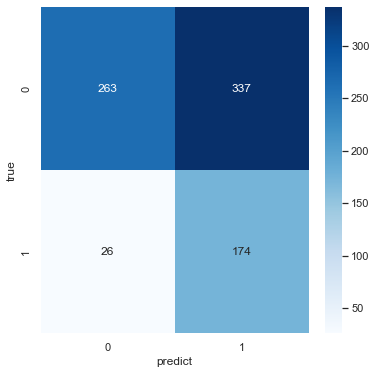

In [135]:
performance(y_test, lr_pred)

# XGBoost

In [75]:
# 같은 Tree 모델 계열인 RandomForest에서 사용한 df 그대로 사용
df

,age,job,marital,education,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,housing_yes,pdays_yes,loan_yes,contact_telephone,y_yes,ageGroup
0,40,1,1,1,1,1,1,0,1,-0.1,93.200,-42.0,1,0,0,0,1,40
1,30,2,2,2,2,1,1,0,1,-1.8,93.075,-47.1,1,0,0,0,1,30
2,36,3,2,2,3,2,1,0,1,-2.9,92.963,-40.8,0,0,0,0,1,30
3,34,4,1,2,4,3,1,3,2,-1.7,94.215,-40.3,1,1,0,0,1,30
4,38,5,1,3,5,2,1,0,1,1.4,93.444,-36.1,1,0,0,0,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,32,1,1,6,4,2,5,0,1,1.4,93.918,-42.7,0,0,0,0,0,30
3996,32,9,2,3,9,3,1,0,1,1.1,93.994,-36.4,1,0,0,1,0,30
3997,24,4,2,4,4,1,6,0,1,1.4,93.918,-42.7,0,0,0,1,0,20
3998,28,1,1,5,9,3,1,0,1,1.1,93.994,-36.4,0,0,0,1,0,20


In [76]:
X = np.array(df.drop(['y_yes'], axis=1))
y = df['y_yes']

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

xgboost의 파라미터로 scale_pos_weight를 줌으로써 class 불균형 해결

In [78]:
xgb_param_grid={
    'n_estimators' : [100,200,300],
    'learning_rate' : [0.05,0.1],
    'max_depth' : [6,10],
    'colsample_bytree' : [0.5,0.8],
    'scale_pos_weight': np.arange(1,10),
}

In [80]:
import xgboost as xgb

grid_cv=GridSearchCV(estimator=xgb.XGBClassifier(objective = 'binary:logistic'),
                     param_grid = xgb_param_grid, scoring=make_scorer(custom_scoring),
                     n_jobs=-1, verbose = 0, cv = StratifiedKFold(5))
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interacti...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                           

In [81]:
xgb_em = grid_cv.best_estimator_
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.05,
 'max_depth': 6,
 'n_estimators': 100,
 'scale_pos_weight': 9}

In [82]:
xgb_grid_results = pd.DataFrame(grid_cv.cv_results_)

In [83]:
xgb_pred = xgb_em.predict(X_test)

In [84]:
custom_scoring(y_test, xgb_pred)

404

정확도: 0.56125
정밀도: 0.34303534303534305
재현율: 0.825
f1 점수: 0.4845814977973569


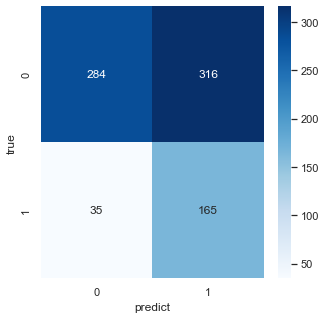

In [85]:
performance(y_test, xgb_pred)

### 3개의 모델 비교 결과
custom_scoring 값이 가장 크게 나온 RandomForest 모델을 최종 모델로

In [86]:
best = rf_grid

In [640]:
# tmp = pd.DataFrame()
# for result in (rf_grid_results, lr_grid_results, xgb_grid_results):
#     result.sort_values(by=["mean_test_score"], inplace=True)
#     tmp = pd.concat([tmp, result.head(1)])

# test data 전처리 파이프라인 구축 및 최종 예측

In [87]:
test = pd.read_csv("data_test.csv")

In [88]:
test

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,39703,46,admin.,married,university.degree,no,no,no,cellular,may,thu,1,999,0,nonexistent,-1.8,93.876,-40.0,yes
1,40136,30,student,single,professional.course,no,yes,no,cellular,jul,wed,4,999,2,failure,-1.7,94.215,-40.3,yes
2,40784,33,technician,married,professional.course,no,no,no,cellular,sep,wed,1,999,0,nonexistent,-1.1,94.199,-37.5,yes
3,40330,31,student,single,unknown,no,yes,no,cellular,aug,mon,3,18,3,failure,-1.7,94.027,-38.3,yes
4,40560,24,student,single,unknown,no,yes,no,cellular,sep,wed,1,5,1,success,-1.1,94.199,-37.5,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,17635,57,retired,married,high.school,no,no,no,cellular,jul,mon,2,999,0,nonexistent,1.4,93.918,-42.7,no
3996,36142,24,admin.,single,university.degree,no,yes,no,cellular,may,wed,2,999,0,nonexistent,-1.8,92.893,-46.2,no
3997,40973,26,student,single,high.school,no,yes,no,telephone,oct,mon,1,999,0,nonexistent,-1.1,94.601,-49.5,no
3998,5683,30,blue-collar,married,basic.9y,no,yes,no,telephone,may,mon,14,999,0,nonexistent,1.1,93.994,-36.4,no


In [89]:
test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [90]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, np.inf]
labels = ['10', '20', '30', '40', '50', '60', '70', '80']
test['ageGroup'] = pd.cut(test['age'], bins, right=False, labels=labels )
test["pdays"] = test["pdays"].apply(lambda x: "no" if x==999 else "yes").astype(str)

In [91]:
from category_encoders import OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [92]:
from sklearn.base import BaseEstimator, TransformerMixin

class colDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(['y','default'], axis=1)
 
 
class unknownToNull(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.applymap(lambda x: np.nan if x=='unknown' else x)
 
 
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # 이진변수
        X = pd.get_dummies(X, columns = ['housing', 'loan', 'contact', 'pdays'], drop_first=True)
        # Ordinal Encoding
        enc = OrdinalEncoder(cols = ['job', 'marital', 'education', 'month', 'poutcome', 'day_of_week']) 
        X = enc.fit_transform(X)
        return X
    
class Imputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imp = IterativeImputer(max_iter = 10, random_state = 0)
        X_ = imp.fit_transform(X)
        X_ = pd.DataFrame(X_)
        X_.columns=X.columns
        return X_

In [93]:
dropper = colDropper()
utn = unknownToNull()
imp = Imputer()
enc = FeatureEncoder()

In [94]:
from sklearn.pipeline import Pipeline
 
pipe = Pipeline([
    ("dropper", colDropper()),
    ("unknownToNULL", unknownToNull()),
    ("encoder", FeatureEncoder()),
    ("imputer", Imputer())
])
 
test = pipe.fit_transform(test)

In [95]:
pred = best.predict(test)

In [96]:
pred

array([1, 1, 1, ..., 1, 0, 1], dtype=uint8)

In [97]:
pred = pd.DataFrame(pred, columns=["yhat"])
pred["yhat"] = pred["yhat"].apply(lambda x:'yes' if x==1 else 'no')
pred

,yhat
0,yes
1,yes
2,yes
3,yes
4,yes
...,...
3995,yes
3996,yes
3997,yes
3998,no


In [ ]:
pred.to_csv("최종submission.csv")

### class 정답 있는 test data로 최종 결과 확인

In [660]:
test = pd.read_csv("data_test.csv")

In [661]:
test

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,39703,46,admin.,married,university.degree,no,no,no,cellular,may,thu,1,999,0,nonexistent,-1.8,93.876,-40.0,yes
1,40136,30,student,single,professional.course,no,yes,no,cellular,jul,wed,4,999,2,failure,-1.7,94.215,-40.3,yes
2,40784,33,technician,married,professional.course,no,no,no,cellular,sep,wed,1,999,0,nonexistent,-1.1,94.199,-37.5,yes
3,40330,31,student,single,unknown,no,yes,no,cellular,aug,mon,3,18,3,failure,-1.7,94.027,-38.3,yes
4,40560,24,student,single,unknown,no,yes,no,cellular,sep,wed,1,5,1,success,-1.1,94.199,-37.5,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,17635,57,retired,married,high.school,no,no,no,cellular,jul,mon,2,999,0,nonexistent,1.4,93.918,-42.7,no
3996,36142,24,admin.,single,university.degree,no,yes,no,cellular,may,wed,2,999,0,nonexistent,-1.8,92.893,-46.2,no
3997,40973,26,student,single,high.school,no,yes,no,telephone,oct,mon,1,999,0,nonexistent,-1.1,94.601,-49.5,no
3998,5683,30,blue-collar,married,basic.9y,no,yes,no,telephone,may,mon,14,999,0,nonexistent,1.1,93.994,-36.4,no


In [665]:
def custom_scoring_yesno(y_test, y_pred):
    yes_defer_score = sum(((y_test!=y_pred) & (y_test=='yes')))*(-3)
    no_try_score = sum(((y_test!=y_pred) & (y_test=='no')))*(-1)
    yes_try_score = sum(((y_test==y_pred) & (y_test=='yes')))*(+5)
    no_defer_score = sum(((y_test==y_pred) & (y_test=='no')))*0
    
    total_score = yes_defer_score+no_try_score+yes_try_score+no_defer_score
    
    return total_score

In [666]:
custom_scoring_yesno(test["y"], pred["yhat"])

2043